In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('/Users/lukelee/Documents/Interview/Learning/')

In [4]:
import yahoo.src.support_functions as sf
import yahoo.src.plot_functions as pf

In [5]:
import yfinance as yf


In [6]:
spx = yf.Ticker("^SPX")

In [7]:
hist = spx.history(period="1mo")

In [8]:
hist.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0


In [9]:
last_obs_date = hist.index.max()
last_obs_date

Timestamp('2025-06-02 00:00:00-0400', tz='America/New_York')

In [10]:
last_close = hist.loc[last_obs_date,'Close']
last_close

np.float64(5935.93994140625)

In [16]:
from importlib import reload
reload(sf)

<module 'yahoo.code.support_functions' from '/Users/lukelee/Documents/Interview/Learning/yahoo/code/support_functions.py'>

In [17]:
opt_data = sf.get_option_chain(spx, last_obs_date)

decorator


In [19]:
opt_data.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiration,put_call_code,dtox
13450,SPX251219C12000000,2025-05-23 18:22:21+00:00,12000.0,0.05,0.00,0.10,0.0,0.0,3.0,2909,0.271980,False,REGULAR,USD,2025-12-19,C,210
13451,SPX260320C12000000,2025-05-27 13:52:04+00:00,12000.0,0.15,0.00,0.15,0.0,0.0,7.0,142,0.231697,False,REGULAR,USD,2026-03-20,C,297
13452,SPX260618C12000000,2025-05-27 15:40:23+00:00,12000.0,0.13,0.05,0.25,0.0,0.0,6.0,12,0.210213,False,REGULAR,USD,2026-06-18,C,387
13453,SPX291221C12000000,2025-06-02 18:19:36+00:00,12000.0,19.00,16.80,23.80,0.0,0.0,22.0,965,0.163615,False,REGULAR,USD,2029-12-21,C,1663
13454,SPX301220C12000000,2025-06-02 18:23:25+00:00,12000.0,47.00,38.40,60.80,0.0,0.0,38.0,2079,0.174446,False,REGULAR,USD,2030-12-20,C,2027


In [11]:
spx_1mo_calls = sf.get_option_chain_tenor('1mo', spx, last_obs_date, last_close, IS_CALL=True)
spx_1mo_puts = sf.get_option_chain_tenor('1mo', spx, last_obs_date, last_close, IS_CALL=False)

S&P 500 INDEX
Call Option 1mo expiration selected: 2025-06-02, dtox of 30
S&P 500 INDEX
Put Option 1mo expiration selected: 2025-06-02, dtox of 30


In [12]:
#[x for x in dir(spx_calls) if not(x.startswith('_'))]

In [13]:
spx_1mo_calls.head(2).T

,0,1
contractSymbol,SPXW250602C02200000,SPXW250602C03000000
lastTradeDate,2025-06-02 15:17:21+00:00,2025-05-30 18:34:12+00:00
strike,2200.0,3000.0
lastPrice,3700.16,2892.0
bid,3697.5,2896.3
ask,3715.8,2914.4
change,9.98999,0.0
percentChange,0.270719,0.0
volume,17.0,6.0
openInterest,1,6


## Visualize Implied volatility Skew/Smile

Plot 2 sets of figures, ones for call and one for put. Each figure will has 4 suboplots of options data based on the combination of the following variables
- x-axis: Log-moneyness, Strike
- y-axis: Implied Volatility, Price

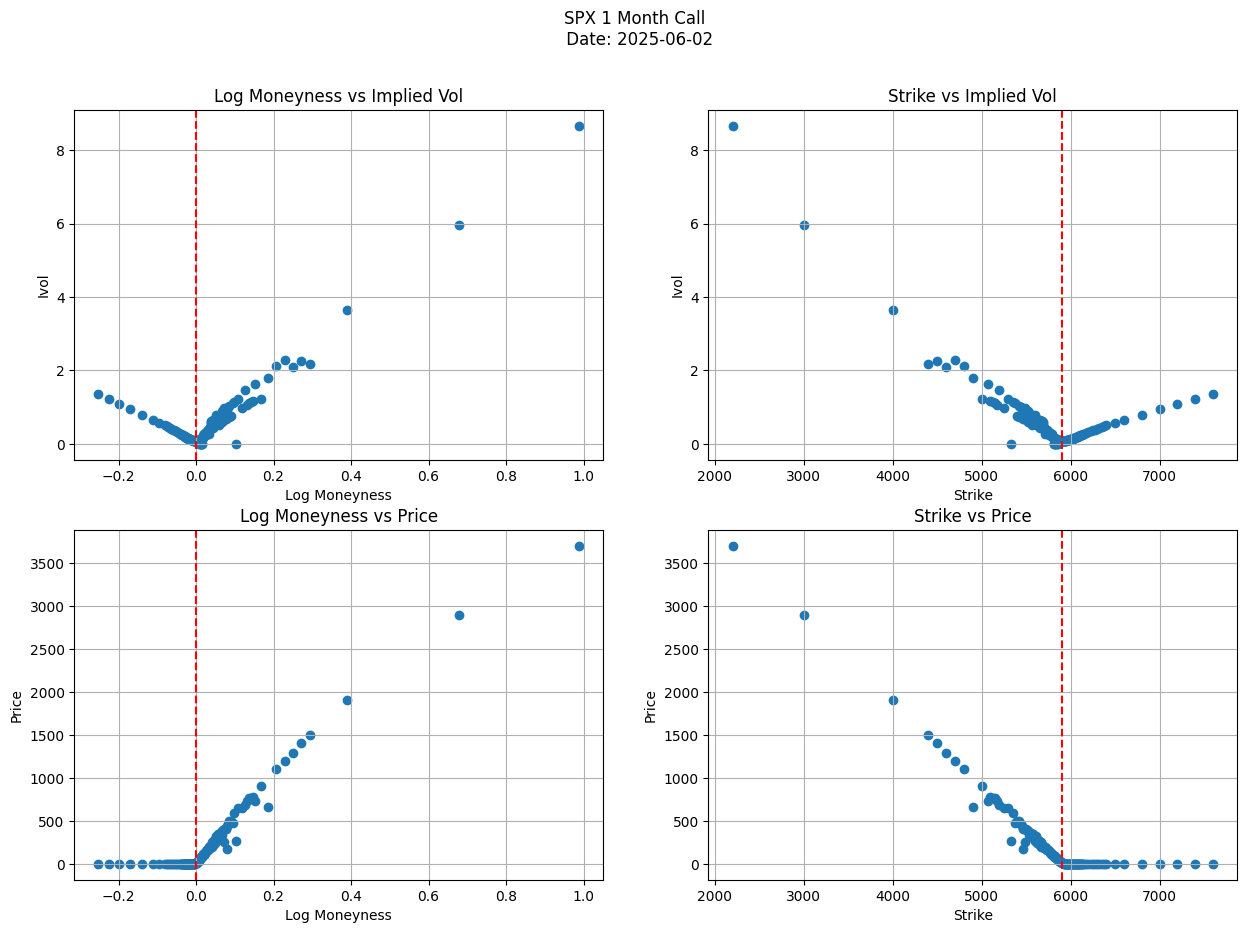

In [14]:
fig_c,ax_c = pf.plot_ivol_and_price(spx_1mo_calls, last_close)
plt.suptitle(f"SPX 1 Month Call \n Date: {last_obs_date.to_pydatetime().date().strftime("%Y-%m-%d")}")
plt.show()

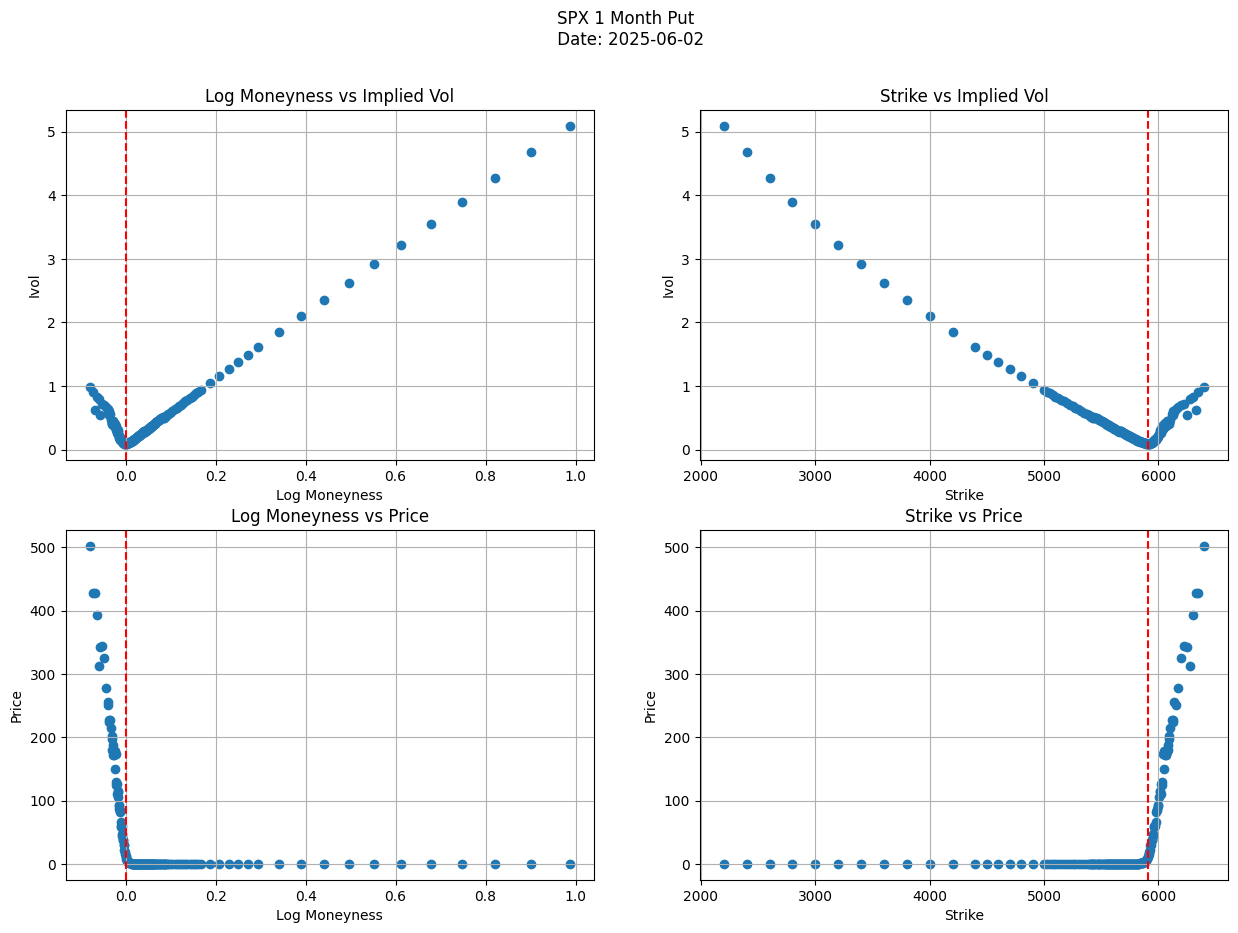

In [15]:
fig_p,ax_p = pf.plot_ivol_and_price(spx_1mo_puts, last_close)
plt.suptitle(f"SPX 1 Month Put \n Date: {last_obs_date.to_pydatetime().date().strftime("%Y-%m-%d")}")
plt.show()